<a href="https://colab.research.google.com/github/kyungmin0101/medical_ai/blob/main/240220/classification_youjin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Signal Smoothing - Gaussian


In [57]:
import pandas as pd
import csv
from scipy.ndimage import gaussian_filter
import os

base_directory1 = '/content/drive/MyDrive/Refractive_Index_Measurements_New/1stSeries_07.05.21'

all_csv_X1 = []
all_csv_Y1 = []

for root, dirs, files in os.walk(base_directory1):
    for file in files:
        if file.endswith('.CSV') and file != 'REF.CSV':
            file_path = os.path.join(root, file)

            with open(file_path, 'rt') as f:
                reader = csv.reader(f)
                csv_content = [raw for raw in reader]
            f.close()
            df = pd.DataFrame(csv_content)[24:].reset_index(drop=True)
            df = df.astype(float)
            df.columns = ['X', 'Y']
            Y = float(os.path.basename(root))
            all_csv_X1.append(df)
            all_csv_Y1.append(Y)

base_directory2 = '/content/drive/MyDrive/Refractive_Index_Measurements_New/2ndSeries_21.05.21'

all_csv_X2 = []
all_csv_Y2 = []

for root, dirs, files in os.walk(base_directory2):
    for file in files:
        if file.endswith('.CSV') and file != 'REF.CSV':
            file_path = os.path.join(root, file)

            with open(file_path, 'rt') as f:
                reader = csv.reader(f)
                csv_content = [raw for raw in reader]
            f.close()
            df = pd.DataFrame(csv_content)[24:].reset_index(drop=True)
            df = df.astype(float)
            df.columns = ['X', 'Y']
            Y = float(os.path.basename(root))
            all_csv_X2.append(df)
            all_csv_Y2.append(Y)

# **classification - 5 label**

In [58]:
Y = pd.DataFrame(all_csv_Y1, columns=['Y'])
df_Y = pd.DataFrame(all_csv_Y1, columns=['Y'])
len(Y)

for i in range(len(df_Y['Y'])):
    if df_Y['Y'][i] < 1.30:
        df_Y['Y'][i] = 'Normal_tissue'
    elif df_Y['Y'][i] >= 1.30 and df_Y['Y'][i] <=1.32:
      df_Y['Y'][i] = 'CIN_1'
    elif df_Y['Y'][i] >= 1.33 and df_Y['Y'][i] <1.38:
      df_Y['Y'][i] = 'CIN_2'
    elif df_Y['Y'][i] >= 1.38 and df_Y['Y'][i] <=1.39:
      df_Y['Y'][i] = 'CIN_3'
    else:
      df_Y['Y'][i] = 'Cervical_Cancer'

print(Y)
print(df_Y)

        Y
0    1.31
1    1.31
2    1.31
3    1.31
4    1.31
..    ...
226  1.42
227  1.42
228  1.42
229  1.42
230  1.42

[231 rows x 1 columns]
                   Y
0              CIN_1
1              CIN_1
2              CIN_1
3              CIN_1
4              CIN_1
..               ...
226  Cervical_Cancer
227  Cervical_Cancer
228  Cervical_Cancer
229  Cervical_Cancer
230  Cervical_Cancer

[231 rows x 1 columns]


# **features Calculation**

In [107]:
import numpy as np
from scipy.ndimage import gaussian_filter
from scipy.signal import find_peaks

analysis_values = []
for df, label in zip(all_csv_X1, all_csv_Y1):
    smoothed_signal = gaussian_filter(df['Y'], sigma=40)
    peaks, _ = find_peaks(smoothed_signal)

    peak_values = df['Y'][peaks].reset_index(drop=True)
    peak_times = df['X'][peaks].reset_index(drop=True)

    time_diff = np.diff(peak_times)
    std_signal_peak = np.std(time_diff)
    mean_signal_peak = np.mean(time_diff)

    analysis_values.append([std_signal_peak, mean_signal_peak])

data = pd.DataFrame(analysis_values, columns=['std', 'mean'])

spectrum_data = pd.concat([data, df_Y], axis=1)
print(spectrum_data)

          std      mean                Y
0    0.149360  3.232519            CIN_1
1    0.150904  3.229835            CIN_1
2    0.143360  3.230373            CIN_1
3    0.146847  3.229300            CIN_1
4    0.147209  3.229300            CIN_1
..        ...       ...              ...
226  0.056895  2.973859  Cervical_Cancer
227  0.054118  2.979688  Cervical_Cancer
228  0.055064  2.975024  Cervical_Cancer
229  0.055808  2.979694  Cervical_Cancer
230  0.054665  2.971524  Cervical_Cancer

[231 rows x 3 columns]


# **Dataset**

In [108]:
test_Y = pd.DataFrame(all_csv_Y2, columns=['Y'])
df_Y_test = pd.DataFrame(all_csv_Y2, columns=['Y'])

for i in range(len(df_Y_test['Y'])):
    if df_Y_test['Y'][i] < 1.30:
        df_Y_test['Y'][i] = 'Normal_tissue'
    elif df_Y_test['Y'][i] >= 1.30 and df_Y_test['Y'][i] <=1.32:
      df_Y_test['Y'][i] = 'CIN_1'
    elif df_Y_test['Y'][i] >= 1.33 and df_Y_test['Y'][i] <1.38:
      df_Y_test['Y'][i] = 'CIN_2'
    elif df_Y_test['Y'][i] >= 1.38 and df_Y_test['Y'][i] <=1.39:
      df_Y_test['Y'][i] = 'CIN_3'
    else:
      df_Y_test['Y'][i] = 'Cervical_Cancer'

print(test_Y)
print(df_Y_test)

        Y
0    1.31
1    1.31
2    1.31
3    1.31
4    1.31
..    ...
226  1.44
227  1.44
228  1.44
229  1.44
230  1.44

[231 rows x 1 columns]
                   Y
0              CIN_1
1              CIN_1
2              CIN_1
3              CIN_1
4              CIN_1
..               ...
226  Cervical_Cancer
227  Cervical_Cancer
228  Cervical_Cancer
229  Cervical_Cancer
230  Cervical_Cancer

[231 rows x 1 columns]


In [109]:
import numpy as np
from scipy.ndimage import gaussian_filter
from scipy.signal import find_peaks

analysis_values2 = []
for df, label in zip(all_csv_X2, all_csv_Y2):
    smoothed_signal = gaussian_filter(df['Y'], sigma=40)
    peaks, _ = find_peaks(smoothed_signal)

    peak_values = df['Y'][peaks].reset_index(drop=True)
    peak_times = df['X'][peaks].reset_index(drop=True)

    time_diff = np.diff(peak_times)
    std_signal_peak = np.std(time_diff)
    mean_signal_peak = np.mean(time_diff)

    analysis_values2.append([std_signal_peak, mean_signal_peak])

data = pd.DataFrame(analysis_values2, columns=['std','mean'])

spectrum_test = pd.concat([data, df_Y_test], axis=1)
print(spectrum_test)

          std      mean                Y
0    0.158012  3.175647            CIN_1
1    0.143858  3.172516            CIN_1
2    0.145312  3.170426            CIN_1
3    0.143976  3.174082            CIN_1
4    0.164553  3.178258            CIN_1
..        ...       ...              ...
226  0.045806  2.718267  Cervical_Cancer
227  0.044999  2.714950  Cervical_Cancer
228  0.066097  2.689914  Cervical_Cancer
229  0.065139  2.692743  Cervical_Cancer
230  0.069293  2.692743  Cervical_Cancer

[231 rows x 3 columns]


In [148]:
from sklearn.model_selection import train_test_split

train, test= train_test_split(spectrum_data, test_size = 0.3, random_state=1, shuffle=True)

X_train1 = spectrum_data[['mean','std']]
y_train1= spectrum_data['Y']

X_train2 = train[['mean','std']]
y_train2= train['Y']

X_train = pd.concat([X_train1, X_train2], axis=0)
y_train = pd.concat([y_train1, y_train2], axis=0)

X_test = test[['mean','std']]
y_test = test['Y']

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(392, 2)
(392,)
(70, 2)
(70,)


In [155]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import time

knn = KNeighborsClassifier(n_neighbors=5, leaf_size = 20)
rf = RandomForestClassifier(n_estimators=20)
svm= SVC(kernel='rbf', C=0.6)

start_knn = time.time()
knn.fit(X_train, y_train)
end_knn = time.time()

start_rf = time.time()
rf.fit(X_train, y_train)
end_rf = time.time()

start_svm = time.time()
svm.fit(X_train, y_train)
end_svm = time.time()


y_knn = knn.predict(X_test)
y_rf = rf.predict(X_test)
y_svm = svm.predict(X_test)

print('knn: ', end_knn-start_knn)
print('svm: ', end_svm-start_svm)
print('rf: ', end_rf-start_rf)

knn:  0.0045642852783203125
svm:  0.012904644012451172
rf:  0.057570457458496094


**KNN**

knn_Accuracy: 0.9142857142857143
                 precision    recall  f1-score   support

          CIN_1       0.86      1.00      0.92         6
          CIN_2       0.93      0.72      0.81        18
          CIN_3       0.69      0.90      0.78        10
Cervical_Cancer       1.00      1.00      1.00        36

       accuracy                           0.91        70
      macro avg       0.87      0.91      0.88        70
   weighted avg       0.93      0.91      0.91        70



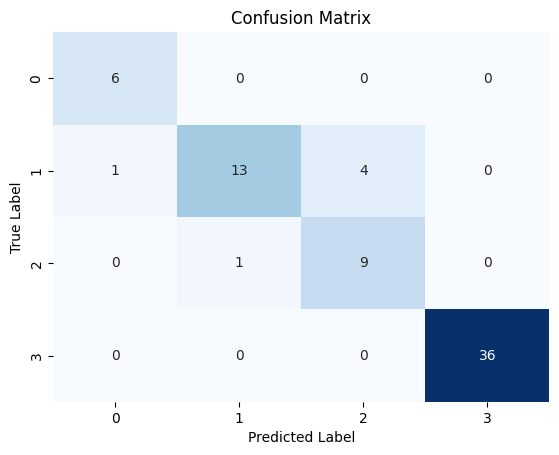

In [150]:
from sklearn.metrics import accuracy_score
accuracy_knn = accuracy_score(y_test, y_knn)
print(f"knn_Accuracy: {accuracy_knn}")

cm_knn = confusion_matrix(y_test, y_knn)
sns.heatmap(cm_knn, annot=True, fmt="d", cmap="Blues", cbar=False)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")

report = classification_report(y_test, y_knn)

print(report)

# Display the plot
plt.show()

**Random Forest**

rf_Accuracy: 0.8857142857142857
                 precision    recall  f1-score   support

          CIN_1       0.86      1.00      0.92         6
          CIN_2       0.92      0.67      0.77        18
          CIN_3       0.62      0.80      0.70        10
Cervical_Cancer       0.97      1.00      0.99        36

       accuracy                           0.89        70
      macro avg       0.84      0.87      0.84        70
   weighted avg       0.90      0.89      0.88        70



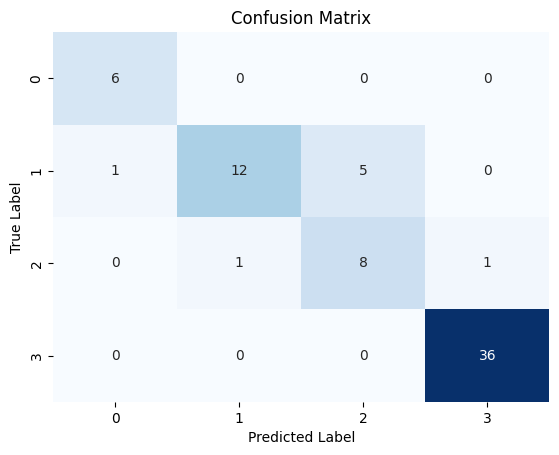

In [145]:
from sklearn.metrics import accuracy_score
accuracy_rf = accuracy_score(y_test, y_rf)
print(f"rf_Accuracy: {accuracy_rf}")

cm_rf = confusion_matrix(y_test, y_rf)
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues", cbar=False)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")

report = classification_report(y_test, y_rf)

print(report)

# Display the plot
plt.show()

**SVM**

svm_Accuracy: 0.7714285714285715
                 precision    recall  f1-score   support

          CIN_1       0.00      0.00      0.00         6
          CIN_2       0.67      0.78      0.72        18
          CIN_3       0.50      0.40      0.44        10
Cervical_Cancer       0.88      1.00      0.94        36

       accuracy                           0.77        70
      macro avg       0.51      0.54      0.52        70
   weighted avg       0.69      0.77      0.73        70



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


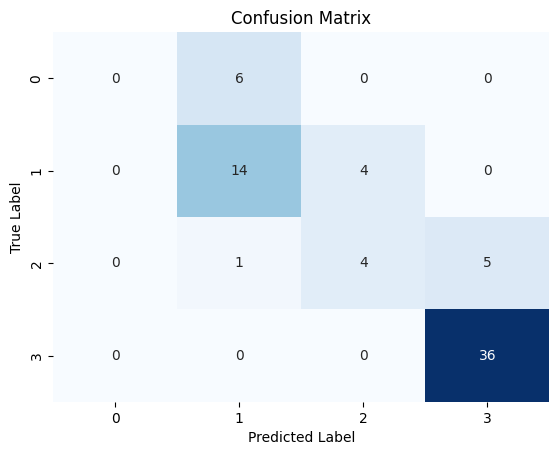

In [156]:
from sklearn.metrics import accuracy_score
accuracy_svm = accuracy_score(y_test, y_svm)
print(f"svm_Accuracy: {accuracy_svm}")

cm_svm = confusion_matrix(y_test, y_svm)
sns.heatmap(cm_svm, annot=True, fmt="d", cmap="Blues", cbar=False)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")

report = classification_report(y_test, y_svm)

print(report)

# Display the plot
plt.show()

svm_Accuracy: 0.6277056277056277
                 precision    recall  f1-score   support

          CIN_1       1.00      0.06      0.11        33
          CIN_2       0.42      0.40      0.41        55
          CIN_3       0.00      0.00      0.00        22
Cervical_Cancer       0.79      1.00      0.88       121

       accuracy                           0.63       231
      macro avg       0.55      0.37      0.35       231
   weighted avg       0.66      0.63      0.58       231



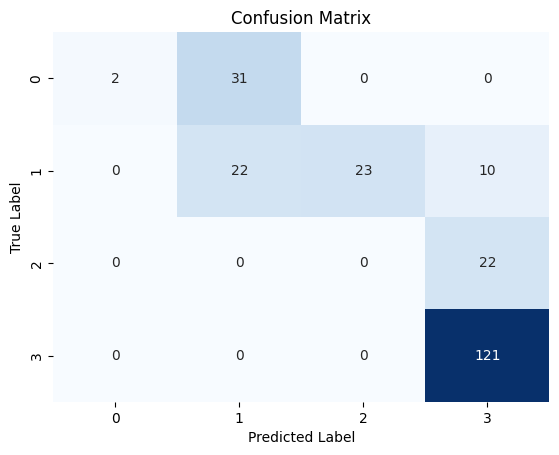

In [141]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score
ensemble_model = VotingClassifier(estimators=[('knn', knn), ('rf', rf), ('svc', svm)], voting= 'hard')

ensemble_model.fit(X_train, y_train)

# Make predictions using the ensemble model
y_pred = ensemble_model.predict(X_test)

accuracy_ensemble = accuracy_score(y_test, y_pred)
print(f"svm_Accuracy: {accuracy_ensemble}")

cm_ensemble = confusion_matrix(y_test, y_pred)
sns.heatmap(cm_ensemble, annot=True, fmt="d", cmap="Blues", cbar=False)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")

report = classification_report(y_test, y_pred)

print(report)

# Display the plot
plt.show()